### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import geopandas as gpd

### Getting the data

We download this data from the New Zealand Crash Analysis Dataset as a json file

In [2]:
url = 'https://opendata.arcgis.com/datasets/a163c5addf2c4b7f9079f08751bd2e1a_0.geojson'
geojson = requests.get(url).json()

In [3]:
# Read the data as GeodataFrame in Geopandas
crs = {'init': 'epsg:3851'} # Coordinate reference system (CRS) for Newzealand
gdf = gpd.GeoDataFrame.from_features(geojson['features'], crs=crs)

In [4]:
gdf.head()

,OBJECTID,OBJECTID_1,Pedestrian,advisorySp,animals,areaUnitID,bicycle,bridge,bus,carStation,...,train,tree,truck,unknownVeh,urban,vanOrUtili,vehicle,waterRiver,weatherA,weatherB
0,2001,667848,0,0,0,527820,0,0,0,1,...,0,1,0,0,Urban,0,0,0,Fine,Unknown
1,2002,667849,0,0,0,527924,0,0,0,1,...,0,0,0,0,Openroad,0,0,0,Fine,Unknown
2,2003,667850,0,0,0,536821,0,0,0,4,...,0,0,0,0,Urban,0,0,0,Light Rain,Unknown
3,2004,667851,0,0,0,538201,0,0,0,3,...,0,0,0,0,Urban,0,0,0,Fine,Unknown
4,2005,667852,0,0,0,542410,0,0,0,1,...,0,0,0,0,Urban,0,0,0,Fine,Unknown


In [5]:
gdf.shape

(674321, 89)

In [6]:
gdf.columns

Index(['OBJECTID', 'OBJECTID_1', 'Pedestrian', 'advisorySp', 'animals',
       'areaUnitID', 'bicycle', 'bridge', 'bus', 'carStation', 'cliffBank',
       'cornerRoad', 'crashDirec', 'crashDista', 'crashFinan', 'crashLoc_1',
       'crashLocat', 'crashRPDir', 'crashRPDis', 'crashRPNew', 'crashRPRS',
       'crashRPSH', 'crashSHDes', 'crashSever', 'crashYear', 'darkLight',
       'debris', 'directionR', 'ditch', 'easting', 'fatalCount', 'fence',
       'flatHill', 'geometry', 'guardRail', 'holiday', 'houseBuild',
       'intersec_1', 'intersecti', 'junctionTy', 'kerb', 'light', 'meshblockI',
       'minorInjur', 'moped', 'motorcycle', 'multiVehic', 'northing',
       'numberOfLa', 'objectThro', 'other', 'otherVehic', 'outdatedLo',
       'overBank', 'parkedVehi', 'phoneBoxEt', 'postOrPole', 'regionDesc',
       'roadCharac', 'roadCurvat', 'roadLane', 'roadMarkin', 'roadSurfac',
       'roadWet', 'roadworks', 'schoolBus', 'seriousInj', 'slipFlood',
       'speedLimit', 'strayAnima', 'str

### Exploratory Data Analysis

Crash

crashSeverity: The severity of a crash. Possible values are 'F' (fatal), 'S' (serious), 'M' (minor), 'N' (non-injury). This is determined by the worst injury sustained in the crash at time of entry.

seriousInjuryCount: A count of the number of serious injuries (inj) associated with this crash.

minorInjuryCount: A count of the number of minor injuries (inj) associated with this crash.

fatalCount: A count of the number of fatal casualties associated with this crash.

In [7]:
start_year = gdf.crashYear.min()
end_year = gdf.crashYear.max()

fatal = gdf['fatalCount'].sum()
major = gdf['seriousInj'].sum()
minor = gdf['minorInjur'].sum()

print("The total death in car crash accidents since the year {}, up to {} is {}.".format(start_year, end_year,fatal))
print("While the total number of serious injuries and minor injuries in car accidents reach {}, {} respectively".format(major,minor))
#respectively in the same period".format(start_year, end_year,fatal, minor, major))

The total death in car crash accidents since the year 2000, up to 2018 is 6991.
While the total number of serious injuries and minor injuries in car accidents reach 45604, 208623 respectively


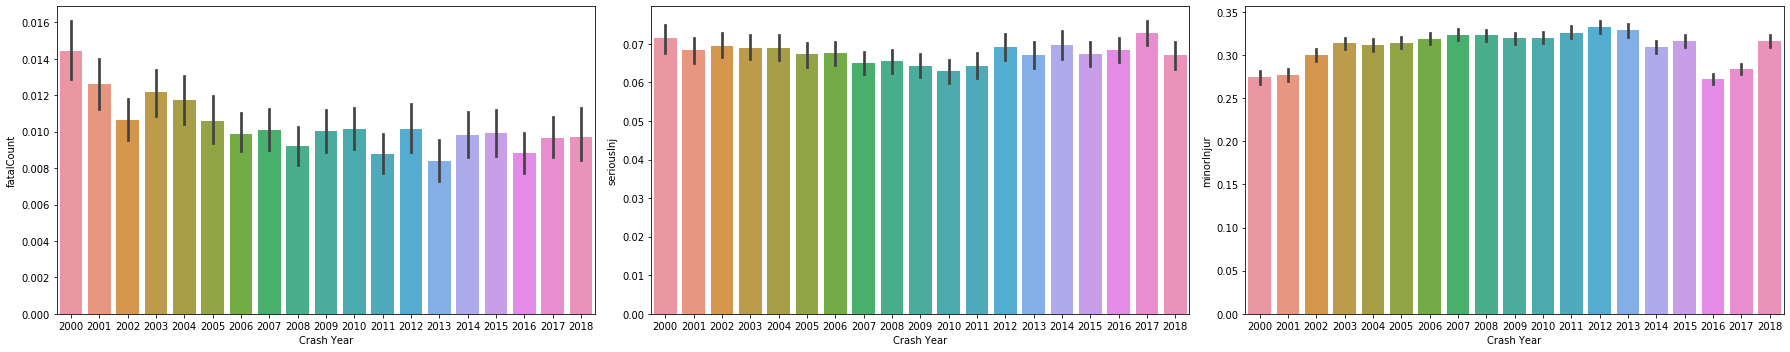

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (25, 5));

sns.barplot(x="crashYear", y="fatalCount",  data=gdf, ax=ax[0]);
sns.barplot(x="crashYear", y="seriousInj",  data=gdf, ax=ax[1]);
sns.barplot(x="crashYear", y="minorInjur",  data=gdf, ax=ax[2]);
[ax[i].set_xlabel('Crash Year') for i in range(3)]
plt.tight_layout()

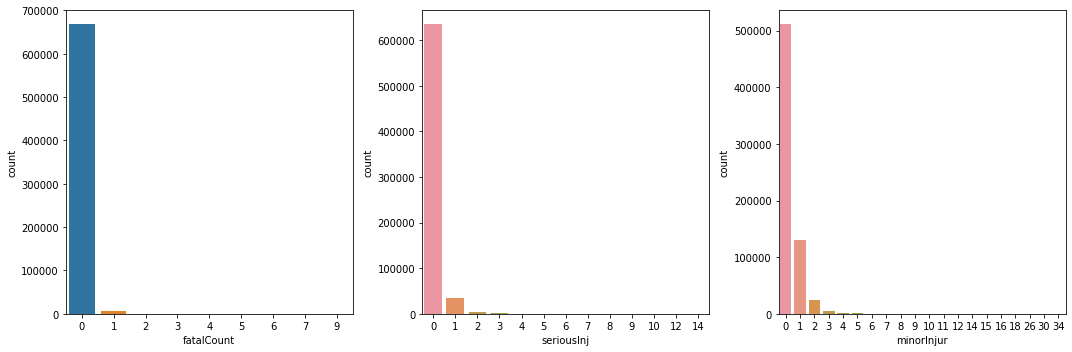

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5));
sns.countplot(x="fatalCount",data=gdf, ax=ax[0])
sns.countplot(x="seriousInj",data=gdf, ax=ax[1])
sns.countplot(x="minorInjur",data=gdf, ax=ax[2]);
#ax.set_xlabel('Crash Year', fontsize=10)
plt.tight_layout()

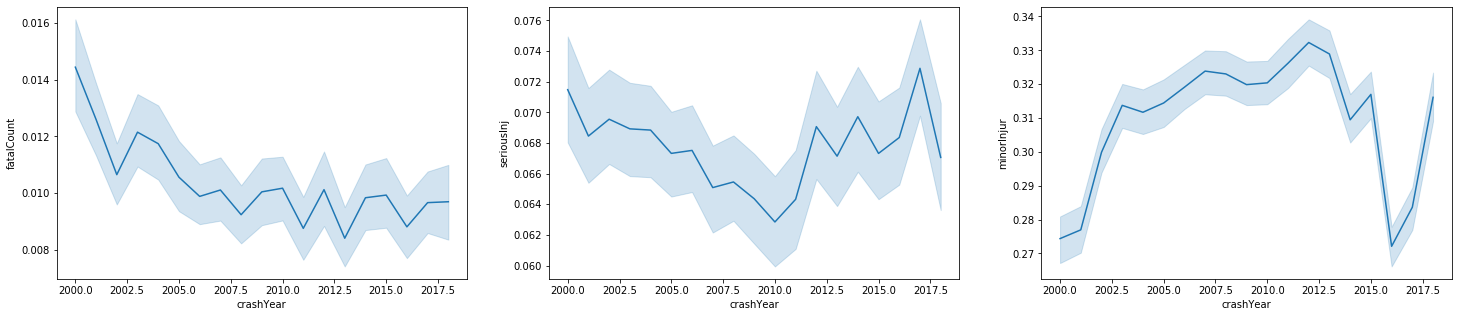

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (25, 5));
sns.lineplot(x="crashYear", y="fatalCount",data=gdf, ax=ax[0]);
sns.lineplot(x="crashYear", y="seriousInj",data=gdf, ax=ax[1]);
sns.lineplot(x="crashYear", y="minorInjur",data=gdf, ax=ax[2]);

### Roads

roadworks, roadCharacter roadCurvature roadLane roadMarkings roadSurface roadWet numberOfLanes intersectionintersectionMidblock flatHill darkLight

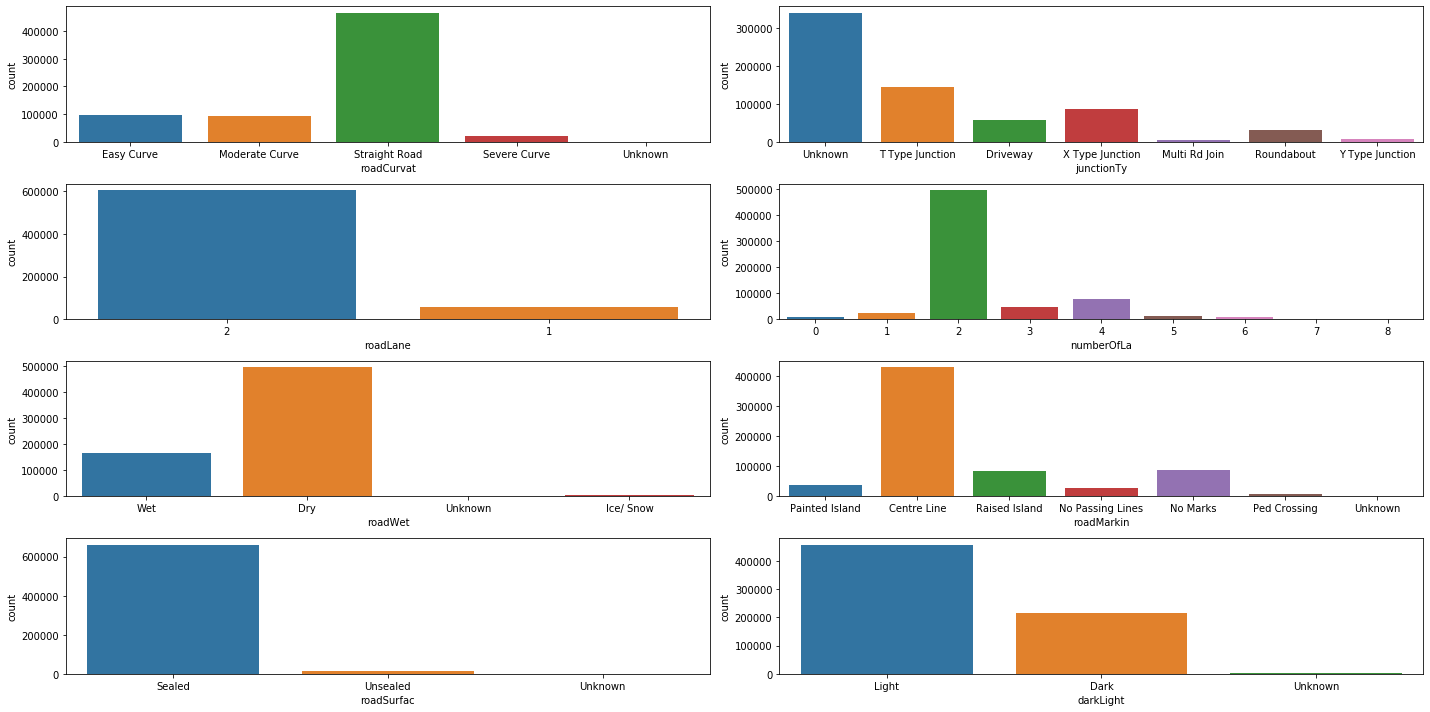

In [11]:
fig, ax = plt.subplots(4, 2, figsize = (20, 10));

sns.countplot(x='roadCurvat',data=gdf, ax=ax[0,0])
sns.countplot(x="junctionTy",data=gdf,  ax=ax[0,1])
sns.countplot(x='roadLane',data=gdf, ax=ax[1,0])
sns.countplot(x='numberOfLa',data=gdf, ax=ax[1,1])
sns.countplot(x='roadWet',data=gdf, ax=ax[2,0])
sns.countplot(x='roadMarkin',data=gdf,  ax=ax[2,1])
sns.countplot(x='roadSurfac',data=gdf, ax=ax[3,0])
sns.countplot(x='darkLight',data=gdf, ax=ax[3,1])
plt.tight_layout()

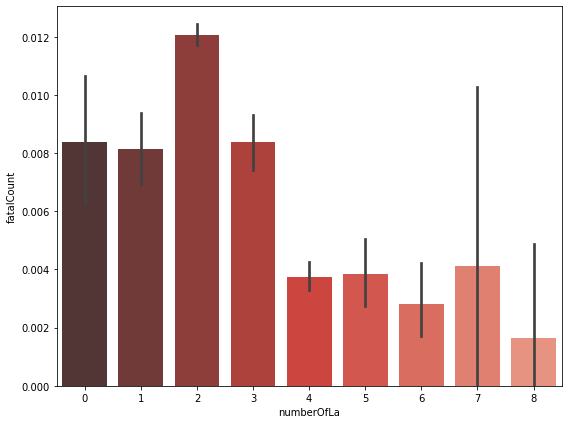

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x='numberOfLa',y = 'fatalCount',data=gdf, palette="Reds_d")
plt.tight_layout();

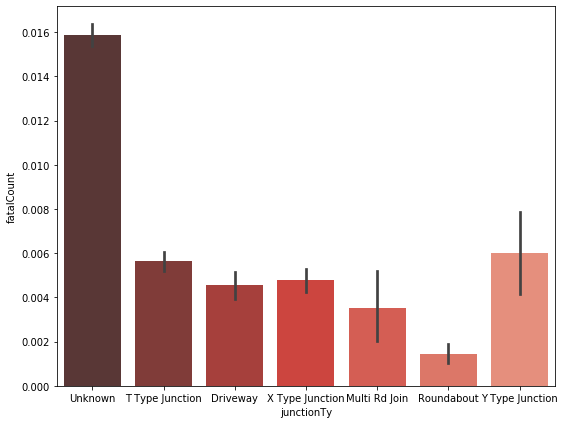

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x='junctionTy',y = 'fatalCount',data=gdf, palette="Reds_d")
plt.tight_layout()

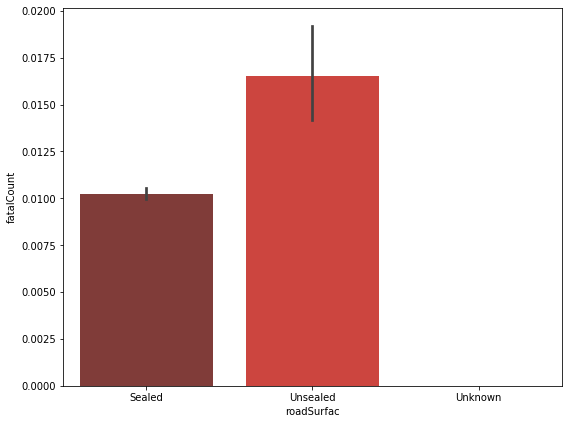

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x='roadSurfac',y = 'fatalCount',data=gdf, palette="Reds_d")
plt.tight_layout()

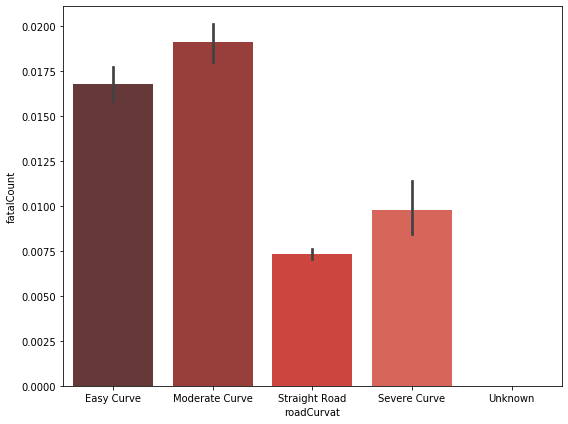

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='roadCurvat',y = 'fatalCount',data=gdf, palette="Reds_d")
plt.tight_layout()

### Traffic

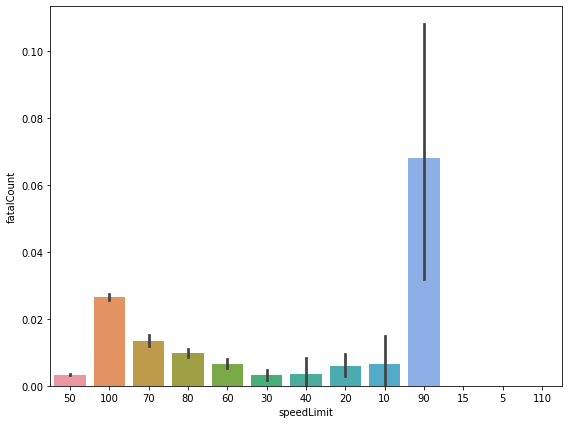

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x="speedLimit", y="fatalCount",  data=gdf);
plt.tight_layout()

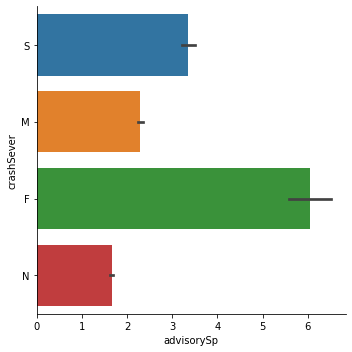

In [17]:
sns.catplot(x="advisorySp", y="crashSever",data=gdf, kind= 'bar');

### Weather

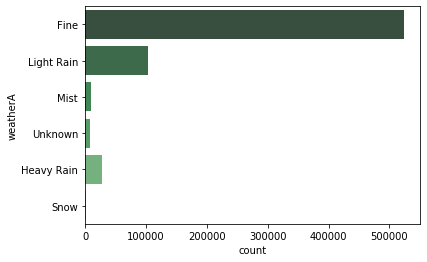

In [18]:
sns.countplot(y="weatherA",data=gdf, palette="Greens_d");

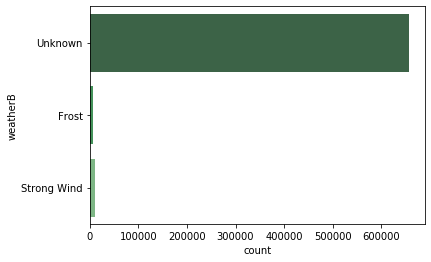

In [19]:
sns.countplot(y="weatherB",data=gdf, palette="Greens_d");

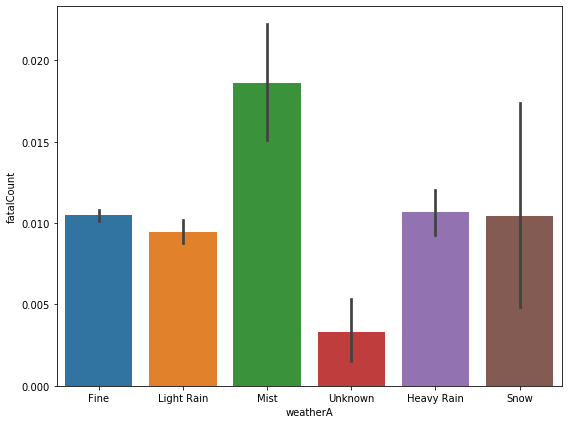

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x="weatherA", y="fatalCount",  data=gdf);
plt.tight_layout()

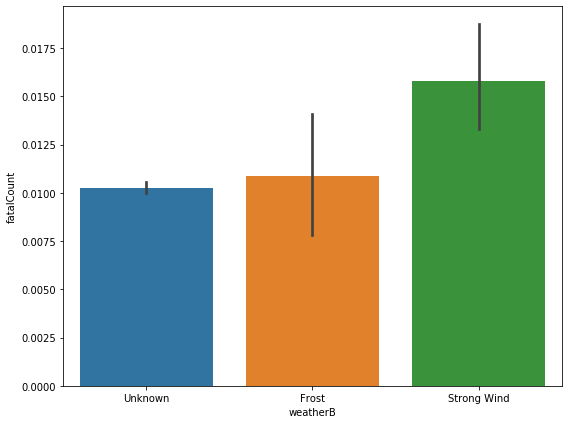

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x="weatherB", y="fatalCount",  data=gdf);
plt.tight_layout()

### Geographic Data Exploration

(166.67652523873306,
 179.10957030210642,
 -47.52866483091503,
 -33.806398085455236)

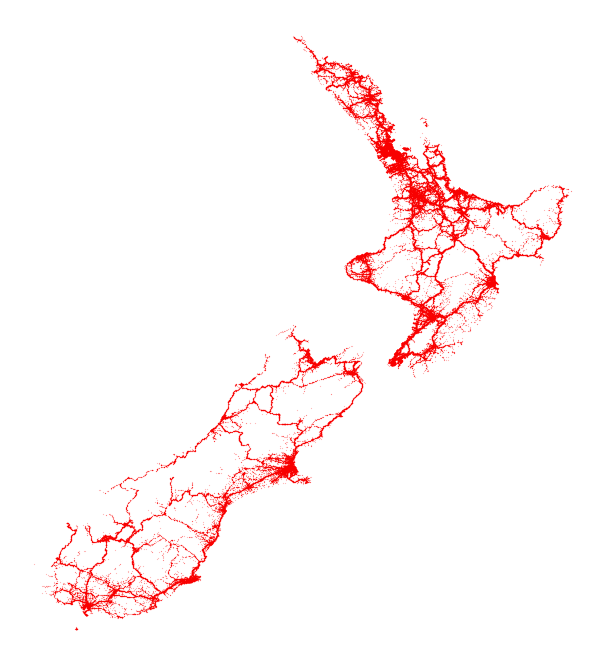

In [22]:
gdf.plot(markersize=0.01, edgecolor='red',figsize=(12,12))
plt.axis('off')

### Predicting the fatal count

Here we shall use fatalCount as our dependent variable and all other attributes will be our independent variables

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [24]:
gdf.head()

,OBJECTID,OBJECTID_1,Pedestrian,advisorySp,animals,areaUnitID,bicycle,bridge,bus,carStation,...,train,tree,truck,unknownVeh,urban,vanOrUtili,vehicle,waterRiver,weatherA,weatherB
0,2001,667848,0,0,0,527820,0,0,0,1,...,0,1,0,0,Urban,0,0,0,Fine,Unknown
1,2002,667849,0,0,0,527924,0,0,0,1,...,0,0,0,0,Openroad,0,0,0,Fine,Unknown
2,2003,667850,0,0,0,536821,0,0,0,4,...,0,0,0,0,Urban,0,0,0,Light Rain,Unknown
3,2004,667851,0,0,0,538201,0,0,0,3,...,0,0,0,0,Urban,0,0,0,Fine,Unknown
4,2005,667852,0,0,0,542410,0,0,0,1,...,0,0,0,0,Urban,0,0,0,Fine,Unknown


In [25]:
# Let us change our data into a dataframe. I suspect most models will not work with GeoDataframe and Geometry Column
df = pd.DataFrame(gdf.drop(['geometry','OBJECTID'], axis = 1))
df.head()

,OBJECTID_1,Pedestrian,advisorySp,animals,areaUnitID,bicycle,bridge,bus,carStation,cliffBank,...,train,tree,truck,unknownVeh,urban,vanOrUtili,vehicle,waterRiver,weatherA,weatherB
0,667848,0,0,0,527820,0,0,0,1,0,...,0,1,0,0,Urban,0,0,0,Fine,Unknown
1,667849,0,0,0,527924,0,0,0,1,1,...,0,0,0,0,Openroad,0,0,0,Fine,Unknown
2,667850,0,0,0,536821,0,0,0,4,0,...,0,0,0,0,Urban,0,0,0,Light Rain,Unknown
3,667851,0,0,0,538201,0,0,0,3,0,...,0,0,0,0,Urban,0,0,0,Fine,Unknown
4,667852,0,0,0,542410,0,0,0,1,0,...,0,0,0,0,Urban,0,0,0,Fine,Unknown


In [26]:
df.isna().sum()

OBJECTID_1         0
Pedestrian         0
advisorySp         0
animals            0
areaUnitID         0
bicycle            0
bridge             0
bus                0
carStation         0
cliffBank          0
cornerRoad         2
crashDirec    253835
crashDista         0
crashFinan         0
crashLoc_1         0
crashLocat         0
crashRPDir     98436
crashRPDis         0
crashRPNew     44665
crashRPRS          0
crashRPSH      81796
crashSHDes         0
crashSever         0
crashYear          0
darkLight          0
debris             0
directionR         0
ditch              0
easting            0
fatalCount         0
               ...  
roadCurvat         0
roadLane       10595
roadMarkin         0
roadSurfac         0
roadWet            0
roadworks          0
schoolBus          0
seriousInj         0
slipFlood          0
speedLimit        10
strayAnima         0
streetLigh         0
suv                0
taxi               0
temporaryS         0
tlaID              0
tlaName      

In [27]:
df = df.dropna()

In [28]:
df.isna().any()

OBJECTID_1    False
Pedestrian    False
advisorySp    False
animals       False
areaUnitID    False
bicycle       False
bridge        False
bus           False
carStation    False
cliffBank     False
cornerRoad    False
crashDirec    False
crashDista    False
crashFinan    False
crashLoc_1    False
crashLocat    False
crashRPDir    False
crashRPDis    False
crashRPNew    False
crashRPRS     False
crashRPSH     False
crashSHDes    False
crashSever    False
crashYear     False
darkLight     False
debris        False
directionR    False
ditch         False
easting       False
fatalCount    False
              ...  
roadCurvat    False
roadLane      False
roadMarkin    False
roadSurfac    False
roadWet       False
roadworks     False
schoolBus     False
seriousInj    False
slipFlood     False
speedLimit    False
strayAnima    False
streetLigh    False
suv           False
taxi          False
temporaryS    False
tlaID         False
tlaName       False
trafficCon    False
trafficIsl    False


We need to convert the categorical variables to numerical variables

In [29]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in df:
    if df[i].dtype == 'object':
        df[i] = lblE.fit_transform(df[i].astype(str))

In [30]:
# One Hot Encoding
df = pd.get_dummies(df)

In [31]:
# Let us split our data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('fatalCount', axis=1), df.fatalCount, test_size=0.33, random_state=42)

In [32]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), 
           rmse(m.predict(X_test), y_test),
           m.score(X_train, y_train), 
           m.score(X_test, y_test)]
    
    if hasattr(m, 'oob_score_'):res.append(m.oob_score_)
    print (res)

In [33]:
m = RandomForestRegressor(n_estimators=50)

In [34]:
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [35]:
print_score(m)

[0.0176738169624264, 0.05050804299448014, 0.9806984466307999, 0.8386131663572152]


#### Understand Important Features

In [36]:
f_imp = pd.DataFrame(data={'importance':m.feature_importances_,'features':X_train.columns}).set_index('features')
f_imp = f_imp.sort_values('importance', ascending=False)
f_imp.head(10)

,importance
features,
crashSever,0.871705
crashLoc_1,0.010103
seriousInj,0.007392
crashDista,0.007347
OBJECTID_1,0.006776
easting,0.006549
advisorySp,0.005344
crashLocat,0.004917
northing,0.004771


Let us plot the 20 most important features and their score

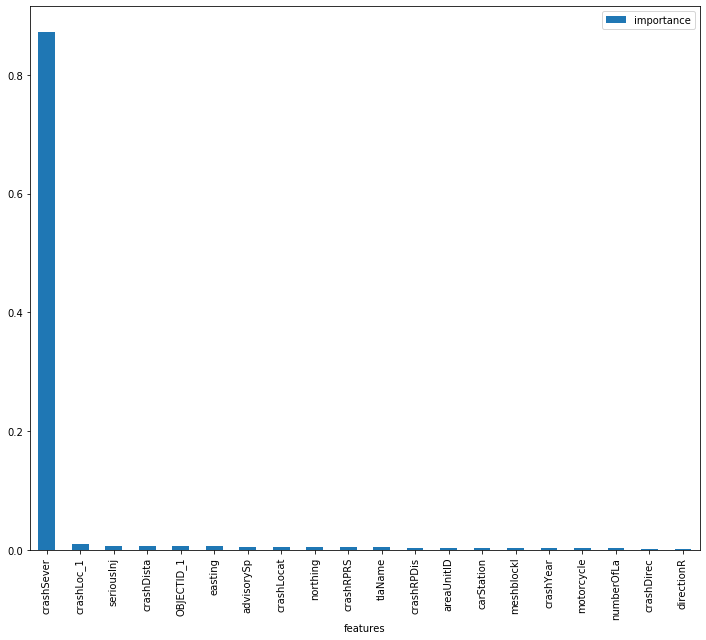

In [37]:
f_imp[:20].plot(kind='bar', figsize=(12,10))

Select features having importance more than 0.0001

In [38]:
f_imp_sel = f_imp[f_imp['importance'] > 0.0001]

In [39]:
y = df.fatalCount

In [40]:
df_imp = df[f_imp_sel.index]
df_imp.shape

(326302, 66)

In [41]:
# Let us split our data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(df_imp, y, test_size=0.33, random_state=42)

In [42]:
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=25, max_features= 0.5,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.04174024724277251, 0.04860959632374476, 0.8923431692905854, 0.8505172609653477, 0.8764818113368398]
